In [1]:
import pandas as pd
import numpy as np
import os
import urllib
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x) #opción para evitar la notacion cientifica

url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
file_path = os.path.join("data", "covid")
os.makedirs(file_path, exist_ok=True)
csv_path = os.path.join(file_path, "WHO-COVID-19-global-data.csv")
urllib.request.urlretrieve(url, csv_path)
df = pd.read_csv(csv_path)
df.columns = [col.strip() for col in df.columns]
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0
...,...,...,...,...,...,...,...,...
31652,2020-07-26,ZW,Zimbabwe,AFRO,138,2434,2,34
31653,2020-07-27,ZW,Zimbabwe,AFRO,78,2512,0,34
31654,2020-07-28,ZW,Zimbabwe,AFRO,192,2704,2,36
31655,2020-07-29,ZW,Zimbabwe,AFRO,113,2817,4,40


In [2]:
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31657 entries, 0 to 31656
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      31657 non-null  object
 1   Country_code       31518 non-null  object
 2   Country            31657 non-null  object
 3   WHO_region         31657 non-null  object
 4   New_cases          31657 non-null  int64 
 5   Cumulative_cases   31657 non-null  int64 
 6   New_deaths         31657 non-null  int64 
 7   Cumulative_deaths  31657 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.9+ MB


In [4]:
df_col = df[df.Country == "Colombia"][["Date_reported", "New_cases"]]
#df_col.index = df_col.Date_reported
#df_col.columns = ["Date_reported_col", "New_cases_col"]
df_arg = df[df.Country == "Argentina"][["Date_reported", "New_cases"]]
#df_arg.index = df_arg.Date_reported
#df_arg.columns = ["Date_reported_col", "New_cases_col"]
df_per = df[df.Country == "Peru"][["Date_reported", "New_cases"]]
#df_per.index = df_per.Date_reported
#df_per.columns = ["Date_reported_col", "New_cases_col"]
df_ecu = df[df.Country == "Ecuador"][["Date_reported", "New_cases"]]
#df_ecu.index = df_ecu.Date_reported
#df_ecu.columns = ["Date_reported_col", "New_cases_col"]
df_chi = df[df.Country == "Chile"][["Date_reported", "New_cases"]]
#df_chi.index = df_chi.Date_reported
#df_chi.columns = ["Date_reported_col", "New_cases_col"]
df_rwa = df[df.Country == "Rwanda"][["Date_reported", "New_cases"]]
#df_rwa.index = df_rwa.Date_reported
#df_rwa.columns = ["Date_reported_rwa", "New_cases_rwa"]
df_ven = df[df.Country_code == "VE"][["Date_reported", "New_cases"]]
#df_ven.index = df_ven.Date_reported
#df_ven.columns = ["Date_reported_ven", "New_cases_ven"]
df_bra = df[df.Country == "Brazil"][["Date_reported", "New_cases"]]
df_usa = df[df.Country_code == "ES"][["Date_reported", "New_cases"]]
df_usa

,Date_reported,New_cases
27319,2020-02-02,5
27320,2020-02-03,0
27321,2020-02-04,0
27322,2020-02-05,0
27323,2020-02-06,0
...,...,...
27494,2020-07-26,2657
27495,2020-07-27,1539
27496,2020-07-28,1309
27497,2020-07-29,905


In [5]:
df_ven.columns = ["Date_reported", "New_cases_ven"]
df_ven = pd.merge(df_ven, df_col, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col"]
df_ven = pd.merge(df_ven, df_chi, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi"]
df_ven = pd.merge(df_ven, df_ecu, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven","New_cases_col", "New_cases_chi","New_cases_ecu"]
df_ven = pd.merge(df_ven, df_per, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per"]
df_ven = pd.merge(df_ven, df_arg, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per", "New_cases_arg"]
df_ven = pd.merge(df_ven, df_bra, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per", "New_cases_arg", "New_cases_bra"]
df_ven = pd.merge(df_ven, df_usa, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per", "New_cases_arg", "New_cases_bra", "New_cases_usa"]


In [6]:
df_ven["pct_chan_ven"] = df_ven["New_cases_ven"].pct_change() * 100
df_ven["pct_chan_col"] = df_ven["New_cases_col"].pct_change() * 100
df_ven["pct_chan_chi"] = df_ven["New_cases_chi"].pct_change() * 100
df_ven["pct_chan_ecu"] = df_ven["New_cases_ecu"].pct_change() * 100
df_ven["pct_chan_per"] = df_ven["New_cases_per"].pct_change() * 100
df_ven["pct_chan_arg"] = df_ven["New_cases_arg"].pct_change() * 100
df_ven["pct_chan_bra"] = df_ven["New_cases_bra"].pct_change() * 100
df_ven["pct_chan_usa"] = df_ven["New_cases_usa"].pct_change() * 100
df_ven.pct_chan_ven[np.isinf(df_ven.pct_chan_ven) | np.isnan(df_ven.pct_chan_ven)] = 0
df_ven.pct_chan_col[np.isinf(df_ven.pct_chan_col) | np.isnan(df_ven.pct_chan_col)] = 0
df_ven.pct_chan_chi[np.isinf(df_ven.pct_chan_chi) | np.isnan(df_ven.pct_chan_chi)] = 0
df_ven.pct_chan_ecu[np.isinf(df_ven.pct_chan_ecu) | np.isnan(df_ven.pct_chan_ecu)] = 0
df_ven.pct_chan_per[np.isinf(df_ven.pct_chan_per) | np.isnan(df_ven.pct_chan_per)] = 0
df_ven.pct_chan_arg[np.isinf(df_ven.pct_chan_arg) | np.isnan(df_ven.pct_chan_arg)] = 0
df_ven.pct_chan_bra[np.isinf(df_ven.pct_chan_bra) | np.isnan(df_ven.pct_chan_bra)] = 0
df_ven.pct_chan_usa[np.isinf(df_ven.pct_chan_usa) | np.isnan(df_ven.pct_chan_usa)] = 0
df_ven["pct_chan_ven_roll"] = df_ven.pct_chan_ven.rolling(7).mean()
df_ven["pct_chan_col_roll"] = df_ven.pct_chan_col.rolling(7).mean()
df_ven["pct_chan_chi_roll"] = df_ven.pct_chan_chi.rolling(7).mean()
df_ven["pct_chan_ecu_roll"] = df_ven.pct_chan_ecu.rolling(7).mean()
df_ven["pct_chan_per_roll"] = df_ven.pct_chan_per.rolling(7).mean()
df_ven["pct_chan_arg_roll"] = df_ven.pct_chan_arg.rolling(7).mean()
df_ven["pct_chan_bra_roll"] = df_ven.pct_chan_bra.rolling(7).mean()
df_ven["pct_chan_usa_roll"] = df_ven.pct_chan_usa.rolling(7).mean()
df_ven = df_ven[~np.isnan(df_ven.pct_chan_ven_roll)] 
df_ven

,Date_reported,New_cases_ven,New_cases_col,New_cases_chi,New_cases_ecu,New_cases_per,New_cases_arg,New_cases_bra,New_cases_usa,pct_chan_ven,...,pct_chan_bra,pct_chan_usa,pct_chan_ven_roll,pct_chan_col_roll,pct_chan_chi_roll,pct_chan_ecu_roll,pct_chan_per_roll,pct_chan_arg_roll,pct_chan_bra_roll,pct_chan_usa_roll
6,2020-03-20,0,37,92,168,0,27,193,3431,0.00000,...,45.11278,35.39858,-18.75000,57.94913,56.25103,96.16313,61.09132,5.33911,12.73302,17.80468
7,2020-03-21,0,51,0,139,84,30,283,2833,0.00000,...,46.63212,-17.42932,-18.75000,63.35454,41.96532,93.69714,61.09132,6.92641,19.39475,15.31478
8,2020-03-22,0,0,0,0,0,0,0,4946,0.00000,...,-100.00000,74.58525,-40.17857,63.35454,56.25103,79.41142,25.37703,6.92641,19.39475,23.08107
9,2020-03-23,30,0,198,26,0,67,0,3646,0.00000,...,0.00000,-26.28387,-25.89286,63.35454,56.25103,79.41142,12.99608,6.92641,19.39475,14.83966
10,2020-03-24,7,110,290,517,98,76,1297,4517,-76.66667,...,0.00000,23.88919,-36.84524,61.92597,-5.47851,342.04879,19.62873,11.44279,27.53219,22.26668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2020-07-26,650,7168,2288,987,4865,5493,55891,2657,44.76615,...,-6.78775,18.88143,11.82927,-2.53143,1.25363,12.57528,3.05760,4.91216,14.50468,7.33798
135,2020-07-27,666,7254,2198,658,3923,4801,51147,1539,2.46154,...,-8.48795,-42.07753,14.08850,-1.76200,2.07259,12.48898,0.24810,7.20720,15.65168,5.31635
136,2020-07-28,534,8181,2133,467,4913,4205,24578,1309,-19.81982,...,-51.94635,-14.94477,5.58195,3.37134,1.54730,8.88557,3.39541,0.96587,10.73573,5.79636
137,2020-07-29,525,8125,1877,1118,4920,4890,23284,905,-1.68539,...,-5.26487,-30.86325,4.11569,2.94996,2.86140,5.50031,3.41227,4.00884,11.97022,-3.50744


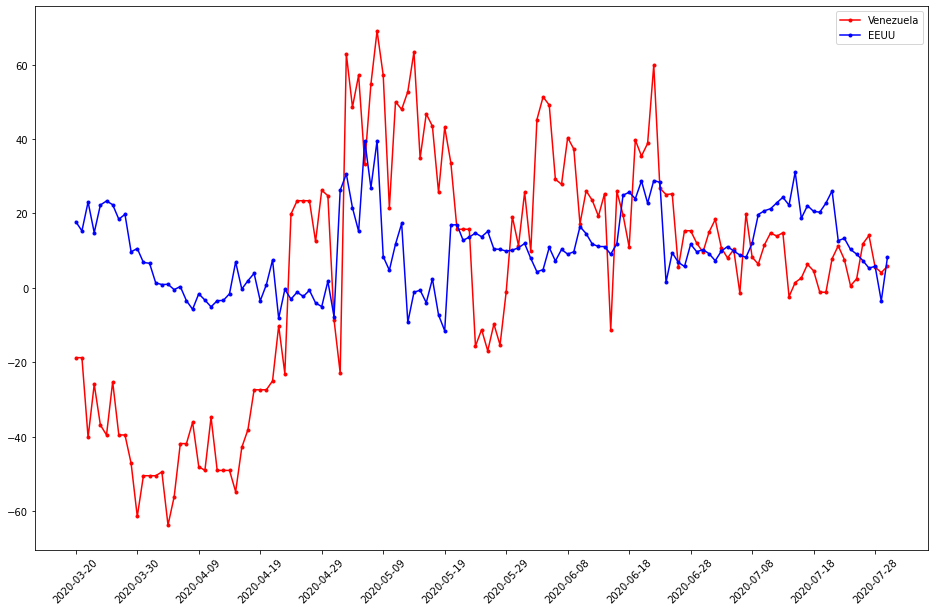

In [7]:
df_ven.index = df_ven.Date_reported
plt.figure(figsize=(16,10))
plt.plot(df_ven.Date_reported, df_ven.pct_chan_ven_roll, 'r.-', label = 'Venezuela')
plt.plot(df_ven.Date_reported, df_ven.pct_chan_usa_roll, 'b.-', label = 'EEUU')
#plt.plot(df_ven.Date_reported, df_ven.pct_chan_bra_roll, 'g.-', label = 'Brasil')
#plt.plot(df_ven.Date_reported, df_ven.pct_chan_chi_roll, 'g.-', label = 'Chile')
#plt.plot(df_ven.Date_reported, df_ven.pct_chan_arg_roll, 'y.-', label = 'Argentina')
x_ticks = np.arange(0, len(df_ven.Date_reported), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
plt.show()